# **Análise Exploratória Multivariada do Conjunto de Dados Iris**
## Um Estudo Analítico das Características Morfológicas e sua Relação com a Taxonomia de Espécies


## **1. Introdução e Contextualização do Estudo**

O conjunto de dados Iris, coletado por Sir Ronald Aylmer Fisher em 1936, representa um marco significativo na história da análise estatística multivariada e da taxonomia botânica. Este conjunto compreende 150 observações de espécimes de íris, distribuídas uniformemente entre três espécies distintas: *Iris setosa*, *Iris versicolor* e *Iris virginica*. Para cada espécime, foram registradas quatro variáveis morfométricas: comprimento e largura da sépala, bem como comprimento e largura da pétala, todas mensuradas em centímetros.

Este estudo visa empregar métodos analíticos multivariados e técnicas de visualização contemporâneas para explorar:

1. As características distintivas entre as três espécies de íris;
2. A variabilidade intra e interespecífica das variáveis morfométricas;
3. A eficácia das diferentes medidas na discriminação taxonômica.


In [11]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec

# Configuração estética para visualizações científicas
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = (12, 10)

# Carregamento do conjunto de dados (ou geração, se necessário)
try:
    # Verificar se o dataframe já está disponível
    df_iris.head()
except NameError:
    # Caso contrário, carregá-lo da biblioteca sklearn
    from sklearn.datasets import load_iris
    iris = load_iris()
    df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df_iris['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    # Renomear colunas para maior clareza na análise
    df_iris.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

# Exibição da estrutura inicial dos dados
df_iris.head()
df_iris.describe()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


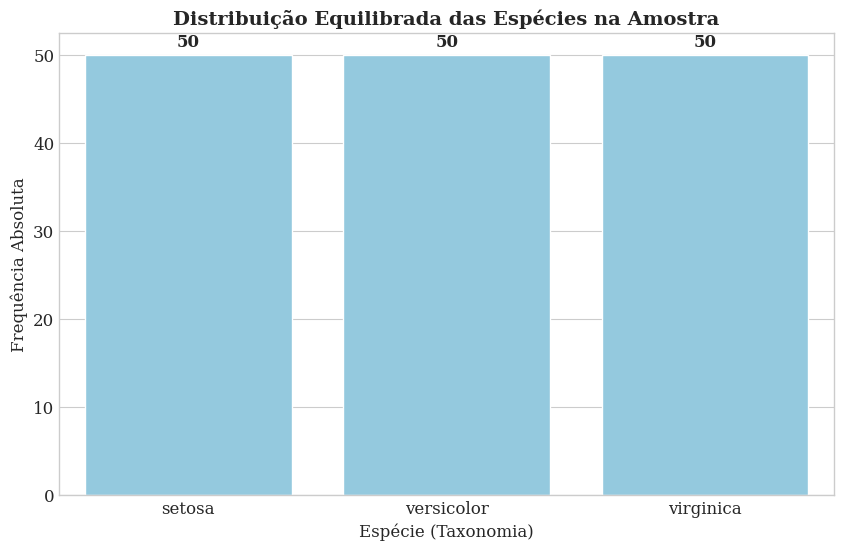

In [12]:
# Análise da distribuição das espécies na amostra
fig, ax = plt.subplots(figsize=(10, 6))
species_counts = df_iris['Species'].value_counts().reset_index()
species_counts.columns = ['Espécie', 'Contagem']

sns.barplot(data=species_counts, x='Espécie', y='Contagem', ax=ax, color='skyblue')

ax.set_title('Distribuição Equilibrada das Espécies na Amostra')
ax.set_xlabel('Espécie (Taxonomia)')
ax.set_ylabel('Frequência Absoluta')

for i, count in enumerate(species_counts['Contagem']):
    ax.text(i, count + 1, str(count), ha='center', fontweight='bold')

plt.show()


## **2. Análise Morfométrica das Pétalas e seu Valor Discriminatório**

As medidas relacionadas às pétalas demonstram ser particularmente informativas para a diferenciação taxonômica. A análise bivariada do comprimento e largura da pétala revela padrões de agrupamento claramente distinguíveis entre as espécies estudadas.


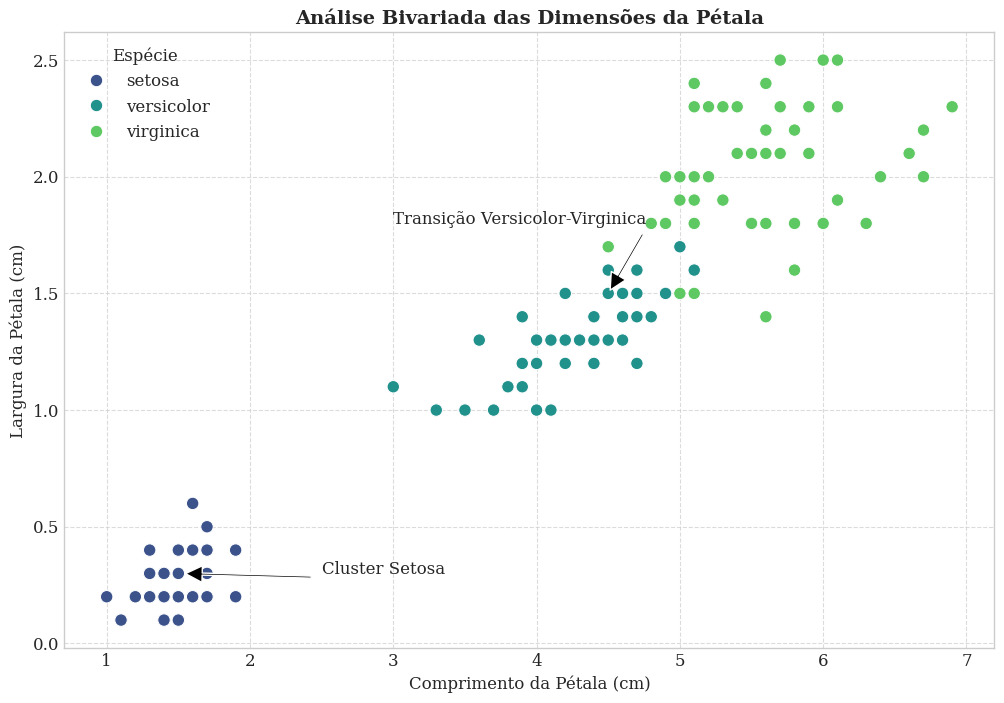

In [13]:
# Visualização bivariada das características da pétala
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Petal.Length', y='Petal.Width', hue='Species', 
                data=df_iris, s=80, palette='viridis')
plt.title('Análise Bivariada das Dimensões da Pétala')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.legend(title='Espécie')
plt.annotate('Cluster Setosa', xy=(1.5, 0.3), xytext=(2.5, 0.3), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Transição Versicolor-Virginica', xy=(4.5, 1.5), xytext=(3.0, 1.8), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## **3. Análise Comparativa Multidimensional das Características Morfológicas**

A comparação sistemática das quatro variáveis morfométricas permite uma avaliação abrangente da variabilidade intraespecífica e dos padrões diferenciais interespecíficos. Esta análise revela a contribuição relativa de cada variável para a discriminação taxonômica.


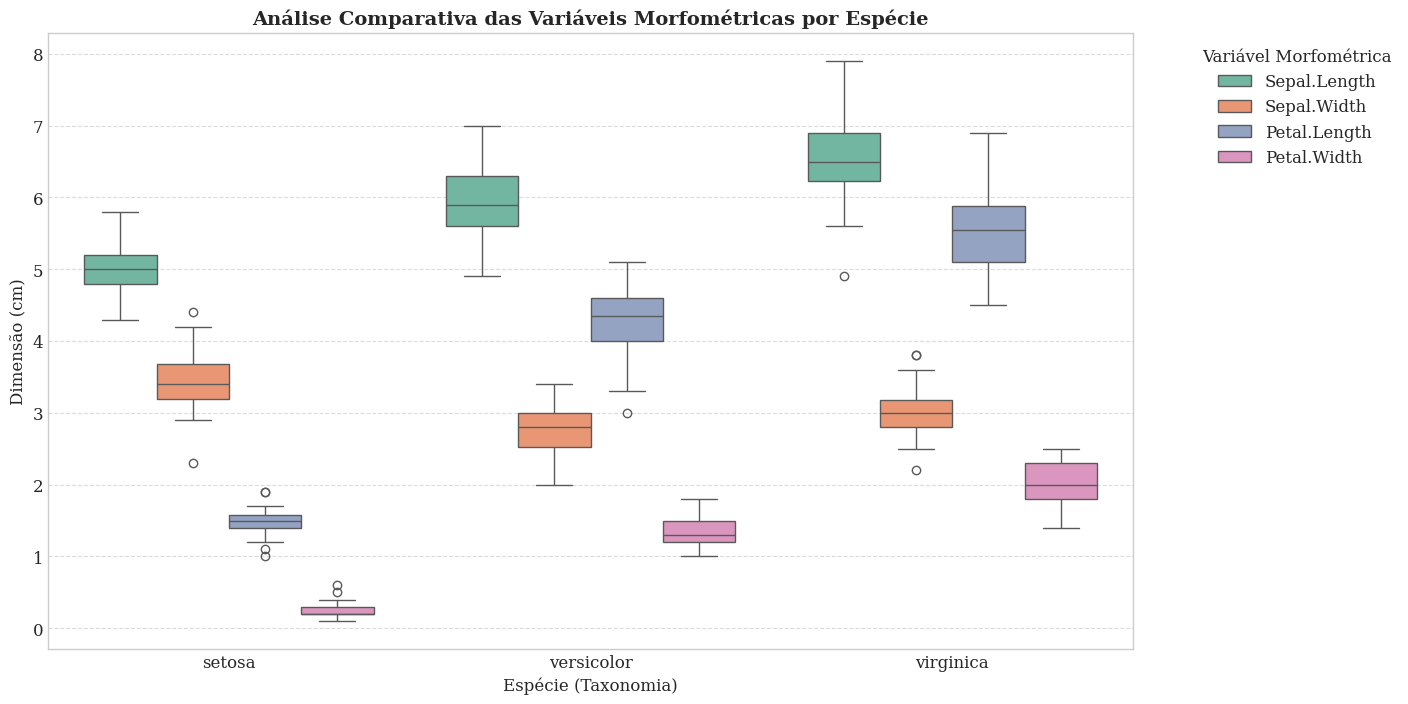

Sepal.Length                                       Sepal.Width  \
                  count  mean   std  min   25%  50%  75%  max       count   
Species                                                                     
setosa             50.0  5.01  0.35  4.3  4.80  5.0  5.2  5.8        50.0   
versicolor         50.0  5.94  0.52  4.9  5.60  5.9  6.3  7.0        50.0   
virginica          50.0  6.59  0.64  4.9  6.22  6.5  6.9  7.9        50.0   

                  ... Petal.Length      Petal.Width                        \
            mean  ...          75%  max       count  mean   std  min  25%   
Species           ...                                                       
setosa      3.43  ...         1.58  1.9        50.0  0.25  0.11  0.1  0.2   
versicolor  2.77  ...         4.60  5.1        50.0  1.33  0.20  1.0  1.2   
virginica   2.97  ...         5.88  6.9        50.0  2.03  0.27  1.4  1.8   

                           
            50%  75%  max  
Species                    
setosa      0.2  0.3  0.6  
versicolor  1.3  1.5  1.8  
virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [14]:
# Transformação e visualização comparativa de todas as variáveis
df_melted = pd.melt(df_iris, id_vars=['Species'], 
                    value_vars=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], 
                    var_name='Característica Morfométrica', value_name='Dimensão (cm)')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Species', y='Dimensão (cm)', hue='Característica Morfométrica', 
           data=df_melted, palette='Set2')
plt.title('Análise Comparativa das Variáveis Morfométricas por Espécie')
plt.xlabel('Espécie (Taxonomia)')
plt.ylabel('Dimensão (cm)')
plt.legend(title='Variável Morfométrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas descritivas por espécies
species_stats = df_iris.groupby('Species', observed=True).describe().round(2)
species_stats

## **4. Redução Dimensional e Visualização de Padrões Taxonômicos**

A análise de componentes principais (PCA) permite reduzir a dimensionalidade dos dados, preservando as informações mais relevantes para a discriminação taxonômica. Esta técnica facilita a visualização de padrões multivariados que não seriam evidentes em análises univariadas ou bivariadas isoladas.


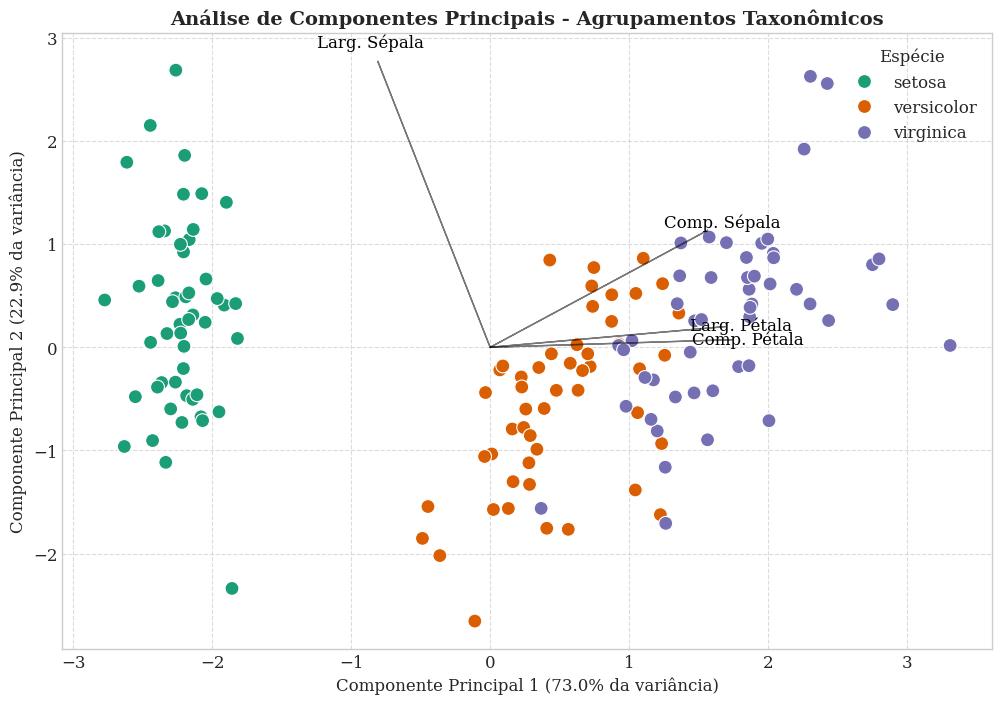

,PC1,PC2
Comp. Sépala,0.521,0.377
Larg. Sépala,-0.269,0.923
Comp. Pétala,0.580,0.024
Larg. Pétala,0.565,0.067


Variância explicada: PC1=73.0%, PC2=22.9%


In [15]:
# Aplicação de PCA para redução dimensional e visualização
X = df_iris.iloc[:, 0:4].values
y = df_iris['Species'].values  # Corrigido: obter diretamente a coluna Species

# Padronização dos dados para escala comparável
X_std = StandardScaler().fit_transform(X)

# Aplicação do PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Criação do dataframe para visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Espécie'] = y

# Visualização dos resultados do PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2',
                hue='Espécie', s=100, data=pca_df, palette='Dark2')
plt.title('Análise de Componentes Principais - Agrupamentos Taxonômicos')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% da variância)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% da variância)')
plt.legend(title='Espécie')
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionando vetores de características no espaço de PCA
feature_names = ['Comp. Sépala', 'Larg. Sépala', 'Comp. Pétala', 'Larg. Pétala']
loadings = pca.components_.T
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='k', alpha=0.5)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='k', ha='center', va='center')

plt.show()

# Análise quantitativa dos componentes principais
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
display(loadings_df.round(3))  # Usar display em vez de print para melhor formatação
print(f"Variância explicada: PC1={pca.explained_variance_ratio_[0]*100:.1f}%, PC2={pca.explained_variance_ratio_[1]*100:.1f}%")



## **5. Síntese Integrativa e Conclusões**

A presente análise morfométrica e estatística do conjunto de dados Iris revelou padrões significativos quanto à diferenciação taxonômica das três espécies estudadas. Os principais achados podem ser sintetizados da seguinte forma:

1. **Diferenciação Taxonômica:** A espécie *Iris setosa* apresenta características morfológicas claramente distinguíveis das outras duas espécies, particularmente quanto às dimensões da pétala, significativamente menores em relação às demais.

2. **Sobreposição Parcial:** As espécies *Iris versicolor* e *Iris virginica* demonstram sobreposição parcial em suas características morfométricas, sendo a sua diferenciação taxonômica mais desafiadora com base exclusivamente nestas variáveis.

3. **Valor Discriminatório:** As variáveis relacionadas à pétala (comprimento e largura) apresentam maior poder discriminatório entre as espécies quando comparadas às variáveis da sépala.

4. **Redução Dimensional:** A análise de componentes principais confirmou os padrões observados nas análises univariadas e bivariadas, evidenciando a separabilidade da espécie *Iris setosa* e a sobreposição parcial entre *Iris versicolor* e *Iris virginica* no espaço bidimensional dos dois primeiros componentes principais.

Estes resultados corroboram a importância da análise multivariada e das técnicas de visualização contemporâneas na compreensão de padrões taxonômicos e na identificação de características morfológicas discriminantes entre espécies.


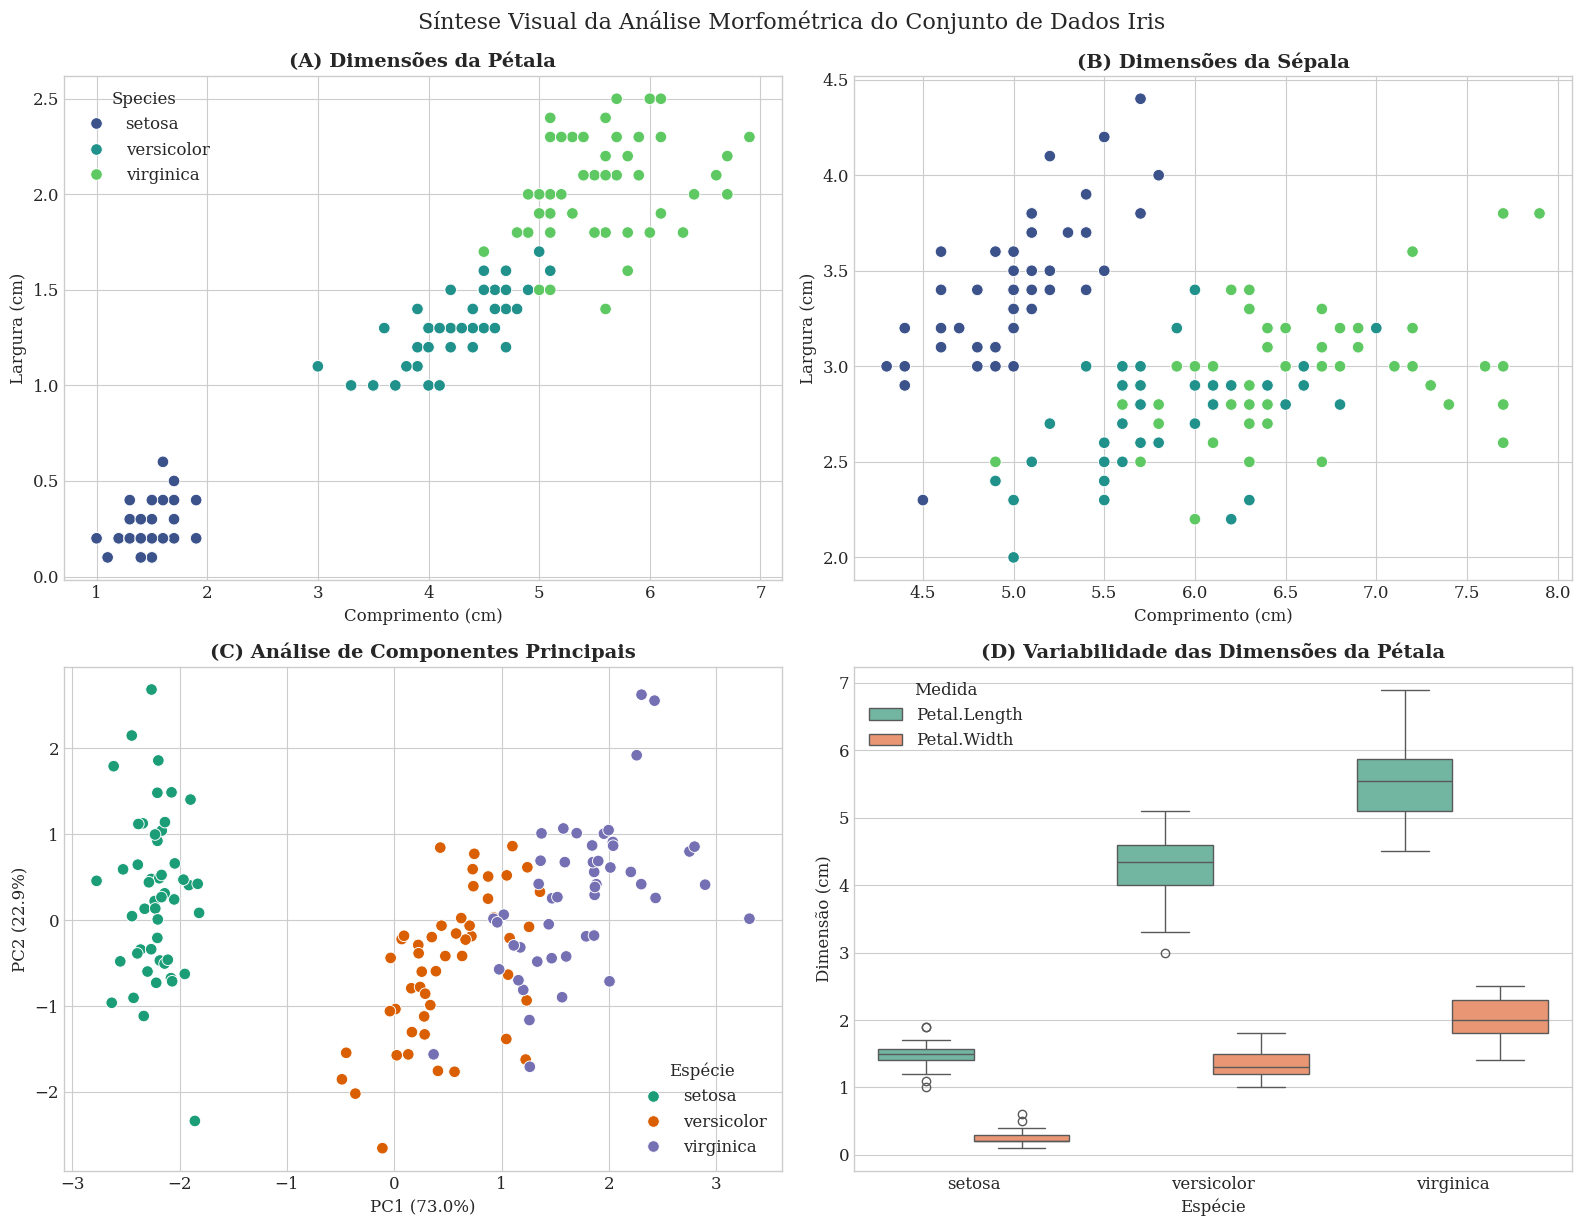

In [16]:
# Visualização conclusiva integrada
fig_summary = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, figure=fig_summary)

# Gráfico 1: Dispersão Pétala
ax1 = fig_summary.add_subplot(gs[0, 0])
sns.scatterplot(x='Petal.Length', y='Petal.Width', hue='Species', 
                data=df_iris, s=70, ax=ax1, palette='viridis')
ax1.set_title('(A) Dimensões da Pétala')
ax1.set_xlabel('Comprimento (cm)')
ax1.set_ylabel('Largura (cm)')

# Gráfico 2: Dispersão Sépala
ax2 = fig_summary.add_subplot(gs[0, 1])
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='Species', 
                data=df_iris, s=70, ax=ax2, palette='viridis')
ax2.set_title('(B) Dimensões da Sépala')
ax2.set_xlabel('Comprimento (cm)')
ax2.set_ylabel('Largura (cm)')
ax2.legend([],[], frameon=False)  # Remove legenda duplicada

# Gráfico 3: PCA
ax3 = fig_summary.add_subplot(gs[1, 0])
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', 
                hue='Espécie', s=70, data=pca_df, ax=ax3, palette='Dark2')
ax3.set_title('(C) Análise de Componentes Principais')
ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

# Gráfico 4: Boxplots das características mais discriminantes
ax4 = fig_summary.add_subplot(gs[1, 1])
boxplot_data = pd.melt(df_iris, id_vars=['Species'], 
                       value_vars=['Petal.Length', 'Petal.Width'], 
                       var_name='Medida', value_name='Valor (cm)')
sns.boxplot(x='Species', y='Valor (cm)', hue='Medida', 
           data=boxplot_data, ax=ax4, palette='Set2')
ax4.set_title('(D) Variabilidade das Dimensões da Pétala')
ax4.set_xlabel('Espécie')
ax4.set_ylabel('Dimensão (cm)')

plt.tight_layout()
plt.suptitle('Síntese Visual da Análise Morfométrica do Conjunto de Dados Iris', 
             fontsize=16, y=1.02)
plt.show()


## **Referências Bibliográficas**

1. Fisher, R.A. (1936). The use of multiple measurements in taxonomic problems. *Annals of Eugenics*, 7(2), 179-188.

2. Anderson, E. (1935). The irises of the Gaspe Peninsula. *Bulletin of the American Iris Society*, 59, 2-5.

3. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*. Springer.

4. Jolliffe, I.T. (2002). *Principal Component Analysis*. Springer.

5. Wickham, H. (2016). *ggplot2: Elegant Graphics for Data Analysis*. Springer.